In [3]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [28]:
df=pd.read_csv('data.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    0 non-null      object  
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 64.4+ KB


In [6]:
group_df=df.groupby('sex')

In [7]:
summary=group_df.describe()
summary

age                                                         bmi  \
        count       mean        std   min   25%   50%    75%   max  count   
sex                                                                         
female  662.0  39.503021  14.054223  18.0  27.0  40.0  51.75  64.0  662.0   
male    676.0  38.917160  14.050141  18.0  26.0  39.0  51.00  64.0  676.0   

                   ... children      charges                              \
             mean  ...      75%  max   count          mean           std   
sex                ...                                                     
female  30.377749  ...      2.0  5.0   662.0  12569.578844  11128.703801   
male    30.943129  ...      2.0  5.0   676.0  13956.751178  12971.025915   

                                                                     
              min        25%         50%           75%          max  
sex                                                                  
female  1607.5101  4885.1587  9412.96250  14454.691825  63770.42801  
male    1121.8739  4619.1340  9369.61575  18989.590250  62592.87309  

[2 rows x 32 columns]

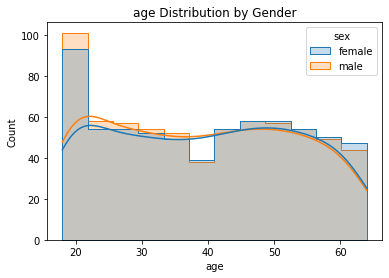

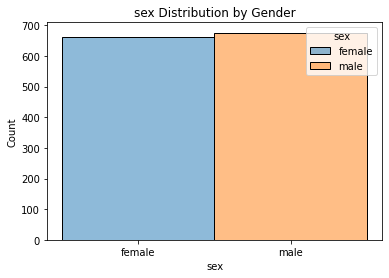

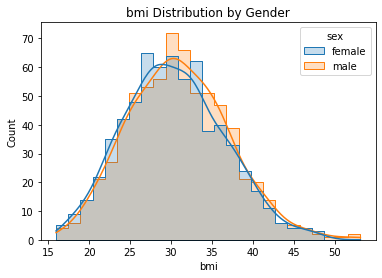

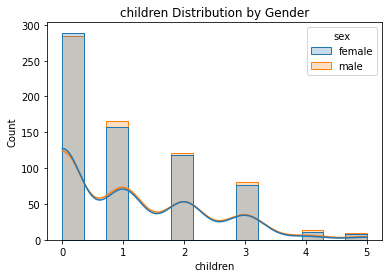

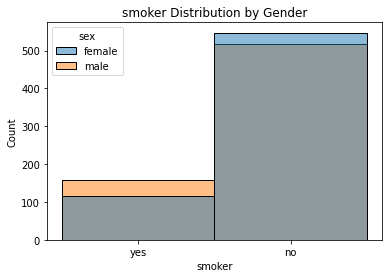

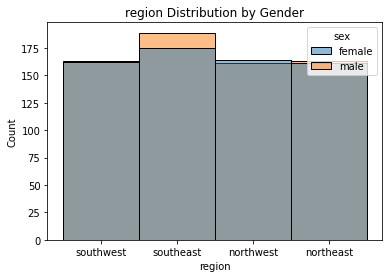

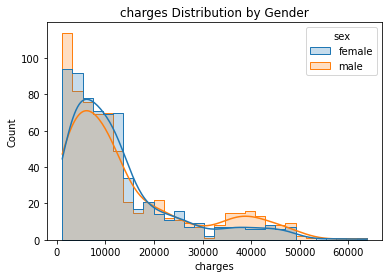

In [13]:
for col in df.columns:
    if df[col].dtype=='object':
        sns.histplot(data=df, x=col,hue='sex')
        plt.title(f'{col} Distribution by Gender')
    else:
        sns.histplot(data=df, x=col, hue='sex', kde=True, element='step')
        plt.title(f'{col} Distribution by Gender')
    plt.show()
    

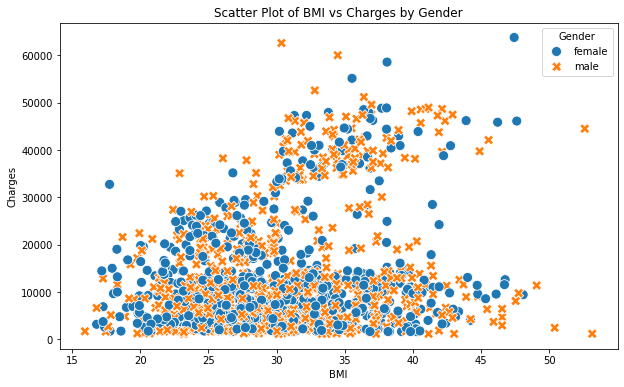

In [15]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex', style='sex', s=100)
plt.title('Scatter Plot of BMI vs Charges by Gender')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Gender')
plt.show()

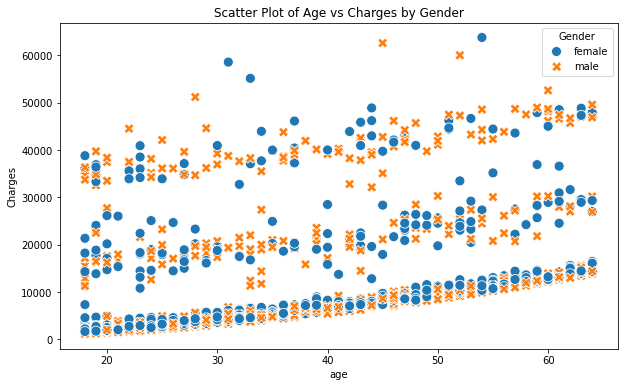

In [17]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='sex', style='sex', s=100)
plt.title('Scatter Plot of Age vs Charges by Gender')
plt.xlabel('age')
plt.ylabel('Charges')
plt.legend(title='Gender')
plt.show()

In [29]:
# Map 'no' to 0 and 'yes' to 1 in the 'smoker' column
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})


In [30]:
# Convert 'children' column to numeric data type
df['children'] = pd.to_numeric(df['children'], errors='coerce')

# Drop any rows with missing values in the 'children' column
df = df.dropna(subset=['children'])

# Apply pd.cut() after ensuring 'children' column contains only numeric values
df['children'] = pd.cut(df['children'], bins=[-1, 0, 1, 2, 3, 4, np.inf], labels=['0', '1', '2', '3', '4', '5+'])


In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [32]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['children'], df['smoker'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Test Results")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the number of children and smoking status.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the number of children and smoking status.")


Chi-Square Test Results
Chi2: 6.887719904947631
P-value: 0.22912555089568779
Degrees of Freedom: 5
Expected Frequencies:
[[456.45440957 117.54559043]
 [257.65022422  66.34977578]
 [190.85201794  49.14798206]
 [124.8490284   32.1509716 ]
 [ 19.88041854   5.11958146]
 [ 14.31390135   3.68609865]]
Fail to reject the null hypothesis: There is no significant relationship between the number of children and smoking status.


In [34]:
chi2_result={'chi2':[chi2],'p_value': [p],'dof':[ dof]}
chi2_df=pd.DataFrame(chi2_result)
chi2_df

,chi2,p_value,dof
0,6.88772,0.229126,5


[]

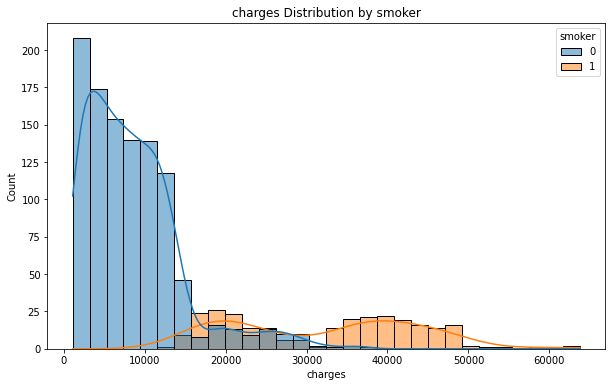

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges',hue='smoker',kde=True)
plt.title(f'charges Distribution by smoker')
plt.plot()

In [ ]:
sns.scatterplot()